In [113]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

In [183]:
df=pd.read_csv('ds_salaries.csv')

In [184]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [185]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [186]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [187]:
#removing unnecessary columns
del df['salary']
del df['salary_currency']

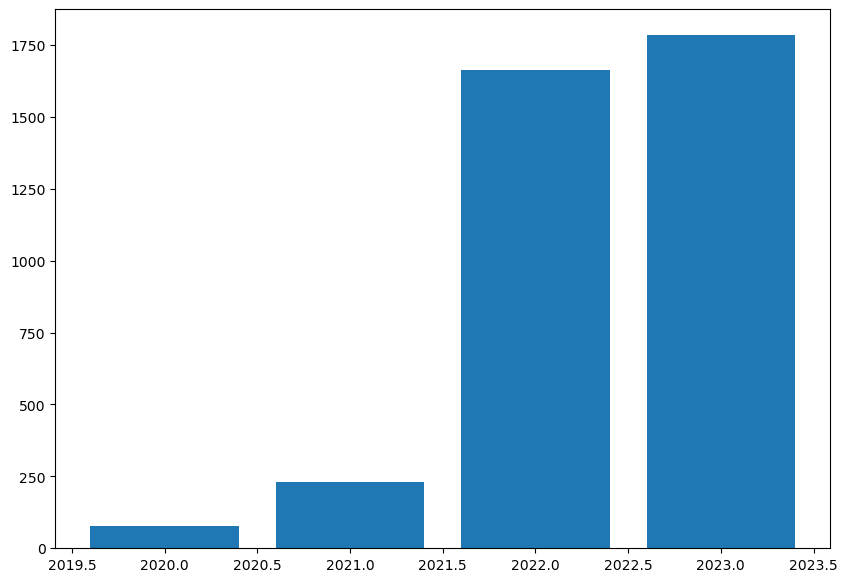

In [188]:
#number of employees in each year...trend being increasing monotonically
x=df['work_year'].value_counts()
fig, ax = plot.subplots(figsize =(10, 7))
plot.bar(x.keys(),list(x))
plot.show()

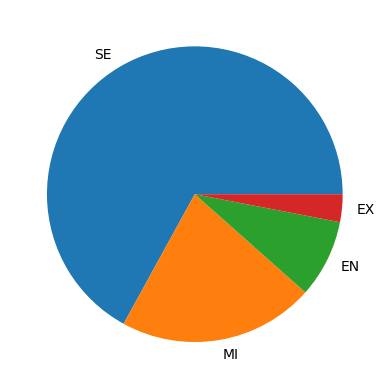

In [189]:
#percentage of employees with expereience levels
x=df['experience_level'].value_counts()
plot.pie(x, labels = x.keys())
plot.show()

In [190]:
#number of employees with each employment types 
df['employment_type'].value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [191]:
#number of employees in each jobe role
x=df['job_title'].value_counts(ascending=True)
x

Finance Data Analyst            1
Staff Data Scientist            1
Marketing Data Engineer         1
Azure Data Engineer             1
Manager Data Management         1
                             ... 
Analytics Engineer            103
Machine Learning Engineer     289
Data Analyst                  612
Data Scientist                840
Data Engineer                1040
Name: job_title, Length: 93, dtype: int64

In [192]:
#x.loc['Manager Data Management':'Analytics Engineer']

In [199]:
#increasing the salary of employees who joined in the year 2023, with experience level 'EX',
#and in the role of 'Data scientist' by 40% and assigning to a new column 'revised_salary'
temp=df.loc[(df.work_year==2023) & (df.experience_level=='EX') & (df.job_title=='Data Scientist')]

temp=temp.assign(revised_salary=lambda x:x['salary_in_usd']+(40/100)*x['salary_in_usd'])
#temp.loc[(58),['salary_in_usd']]=123456
old,new=dict(df['salary_in_usd']),dict(temp['revised_salary'])
for k,v in old.items():
    if k in new:
        old[k]=new[k]
temp['revised_salary']=new
df=df.assign(revised_salary=old)
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,revised_salary
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L,85847.0
1,2023,MI,CT,ML Engineer,30000,US,100,US,S,30000.0
2,2023,MI,CT,ML Engineer,25500,US,100,US,S,25500.0
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M,175000.0
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M,120000.0
...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L,412000.0
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L,151000.0
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S,105000.0
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L,100000.0


In [18]:
df1=pd.DataFrame(np.random.randn(6,4))

In [19]:
df1.columns=list('ABCD')

In [20]:
df1

,A,B,C,D
0,-0.821110,0.143594,-0.185489,0.276678
1,2.101212,0.381851,0.294074,0.067339
2,-0.343631,-1.175335,-0.119138,0.993650
3,-0.256865,0.331660,1.102752,-0.123963
4,-0.783660,1.204789,0.551870,-0.415328
5,0.805383,1.466009,-1.614743,-1.290592


In [21]:
df1.loc[1:3,'B':'C']

,B,C
1,0.381851,0.294074
2,-1.175335,-0.119138
3,0.331660,1.102752


In [22]:
df2=pd.DataFrame(np.random.randn(4,3),columns=list('BCF'))

In [23]:
df2

,B,C,F
0,1.021521,-0.996365,-0.721687
1,1.059025,1.348920,-1.394890
2,1.109572,-0.970683,-0.715775
3,0.256688,0.803367,1.717421


In [24]:
pd.concat([df1,df2],axis=1)

,A,B,C,D,B,C,F
0,-0.821110,0.143594,-0.185489,0.276678,1.021521,-0.996365,-0.721687
1,2.101212,0.381851,0.294074,0.067339,1.059025,1.348920,-1.394890
2,-0.343631,-1.175335,-0.119138,0.993650,1.109572,-0.970683,-0.715775
3,-0.256865,0.331660,1.102752,-0.123963,0.256688,0.803367,1.717421
4,-0.783660,1.204789,0.551870,-0.415328,NaN,NaN,NaN
5,0.805383,1.466009,-1.614743,-1.290592,NaN,NaN,NaN


In [25]:
pd.concat([df1,df2],join='inner',axis=1)

,A,B,C,D,B,C,F
0,-0.821110,0.143594,-0.185489,0.276678,1.021521,-0.996365,-0.721687
1,2.101212,0.381851,0.294074,0.067339,1.059025,1.348920,-1.394890
2,-0.343631,-1.175335,-0.119138,0.993650,1.109572,-0.970683,-0.715775
3,-0.256865,0.331660,1.102752,-0.123963,0.256688,0.803367,1.717421


In [26]:
x=df.value_counts('job_title',ascending=True)

<BarContainer object of 20 artists>

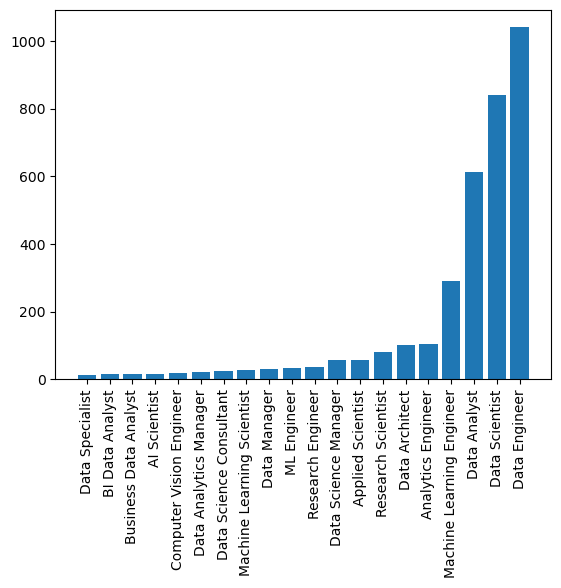

In [203]:
#number of employees in the top 20 departments
l=20
X=x[-l:].keys()
Y=x[-l:]
plot.xticks(ticks=range(len(x[-l:])), rotation=90)

plot.bar(X,Y)

In [32]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [34]:
#--merge,join